# Stock Price Predictor

In this project I will apply different regression models using yfinance library. 
Yahoo finance website: https://finance.yahoo.com

This project was made with help of FreecodeCamp Machine Learning course: https://www.youtube.com/watch?v=NWONeJKn6kc&t=10601s

### The problem statement:
> to determine the closing price of the stock.

### The goal of this project:
 * practice building linear regression, ridge regression, support vector regressor and decision tree regressor using Scikit-learn;
 * compare these models on this particular task;
 * try implementing GridSearchCV on SVR;
 * try implementing cost complexity pruning on decision tree. 

# Steps:

   * **Data preprocessing**
   * **Linear Regression**
   * **Ridge Regression**
   * **Support Vector Regressor**
   * **Decision Tree Regressor**

### Import libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error 

## Import the data

In [45]:
stocks = input('Enter the code of the stock:')
data = yf.download(stocks, '2009-01-01', '2022-01-18', auto_adjust=True)

data.head()

Enter the code of the stock:GC=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-12-31,860.000000,883.599976,858.400024,883.599976,35
2009-01-02,881.500000,881.500000,868.900024,878.799988,46
2009-01-05,882.000000,883.500000,847.000000,857.200012,35
2009-01-06,855.099976,867.599976,840.000000,865.400024,113
2009-01-07,862.000000,867.000000,837.700012,841.099976,101


In [46]:
data.shape


(3282, 5)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-12-31 to 2022-01-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB


In [48]:
data.describe()

,Open,High,Low,Close,Volume
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000
mean,1387.294059,1394.444059,1379.494364,1387.135435,5562.015235
std,257.477523,258.993077,255.776252,257.374367,29604.771805
min,805.599976,808.799988,805.599976,806.700012,0.000000
25%,1216.549988,1223.099976,1210.450012,1217.925018,43.000000
50%,1310.950012,1315.900024,1306.500000,1310.900024,146.000000
75%,1603.650024,1612.800049,1591.950012,1603.699951,479.250000
max,2045.500000,2063.000000,2040.000000,2051.500000,386334.000000


## Visualization

<Figure size 1080x504 with 0 Axes>

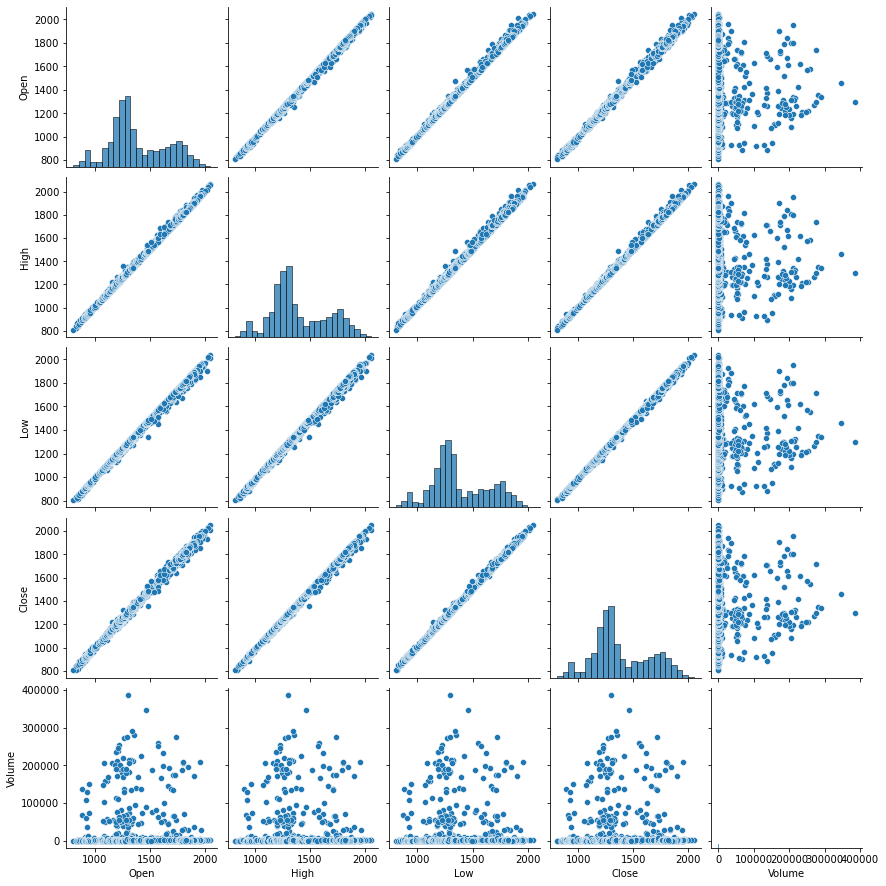

In [49]:
plt.figure(figsize=(15, 7))
sns.pairplot(data)

Text(0.5, 1.0, 'GC=F Price Series')

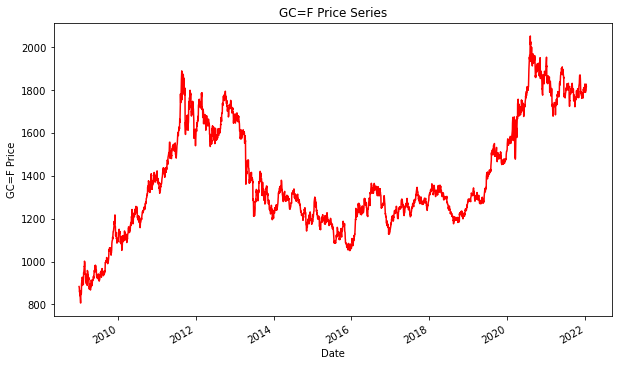

In [50]:
data.Close.plot(figsize=(10, 6), c='r')
plt.ylabel(f'{stocks} Price')
plt.title(f'{stocks} Price Series')

## Splitting the data

In [51]:
y = data.Close
X = data.drop('Close', axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2461, 4)
X_test shape: (821, 4)
y_train shape: (2461,)
y_test shape: (821,)


# LinearRegression

In [53]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_pred = linear_model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, linear_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, linear_pred)}')
print(f'Score of the model: {linear_model.score(X_test, y_test)}')

Mean Squared Error: 25.88066546244028
Mean Absolute Error: 3.4343331989328685
Score of the model: 0.9996137293420824


# Ridge Regression

In [54]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(ridge_model, param_grid, refit=True, verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ......................alpha=0.0001;, score=1.000 total time=   0.0s
[CV 2/5] END ......................alpha=0.0001;, score=1.000 total time=   0.0s
[CV 3/5] END ......................alpha=0.0001;, score=1.000 total time=   0.0s
[CV 4/5] END ......................alpha=0.0001;, score=1.000 total time=   0.0s
[CV 5/5] END ......................alpha=0.0001;, score=1.000 total time=   0.0s
[CV 1/5] END .......................alpha=0.001;, score=1.000 total time=   0.0s
[CV 2/5] END .......................alpha=0.001;, score=1.000 total time=   0.0s
[CV 3/5] END .......................alpha=0.001;, score=1.000 total time=   0.0s
[CV 4/5] END .......................alpha=0.001;, score=1.000 total time=   0.0s
[CV 5/5] END .......................alpha=0.001;, score=1.000 total time=   0.0s
[CV 1/5] END ........................alpha=0.01;, score=1.000 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;,

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             verbose=3)

In [55]:
best_ridge_model = grid.best_estimator_

ridge_pred = best_ridge_model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, ridge_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, ridge_pred)}')
print(f'Score of the model: {best_ridge_model.score(X_test, y_test)}')

Mean Squared Error: 25.897827573912824
Mean Absolute Error: 3.4357320361030816
Score of the model: 0.9996134731964241


# SVR

In [56]:
svr = SVR()

param_grid = {'C': [10, 100, 1000], 
             'gamma': [0.1, 0.01, 0.001, 0.0001]}

grid = GridSearchCV(svr, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ..................C=10, gamma=0.1;, score=-0.124 total time=   0.3s
[CV 2/5] END ..................C=10, gamma=0.1;, score=-0.065 total time=   0.3s
[CV 3/5] END ..................C=10, gamma=0.1;, score=-0.032 total time=   0.3s
[CV 4/5] END ..................C=10, gamma=0.1;, score=-0.104 total time=   0.3s
[CV 5/5] END ..................C=10, gamma=0.1;, score=-0.129 total time=   0.3s
[CV 1/5] END .................C=10, gamma=0.01;, score=-0.096 total time=   0.3s
[CV 2/5] END .................C=10, gamma=0.01;, score=-0.039 total time=   0.4s
[CV 3/5] END .................C=10, gamma=0.01;, score=-0.000 total time=   0.3s
[CV 4/5] END .................C=10, gamma=0.01;, score=-0.071 total time=   0.3s
[CV 5/5] END .................C=10, gamma=0.01;, score=-0.099 total time=   0.3s
[CV 1/5] END .................C=10, gamma=0.001;, score=0.143 total time=   0.4s
[CV 2/5] END .................C=10, gamma=0.001;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [57]:
svr_best_model = grid.best_estimator_

svr_best_model

SVR(C=1000, gamma=0.0001)

In [58]:
svr_pred = svr_best_model.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, svr_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, svr_pred)}')
print(f'Score of the model: {svr_best_model.score(X_test, y_test)}')

Mean Squared Error: 4686.5364386061
Mean Absolute Error: 22.330485554065042
Score of the model: 0.9300531311251372


# Decision Tree

In [63]:
dt = DecisionTreeRegressor(random_state=0)
dt = dt.fit(X_train, y_train)

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.998618,0.000184
1,0.000002,0.998618,0.000184
2,0.000002,0.998618,0.000184
3,0.000002,0.998618,0.000184
4,0.000002,0.998618,0.000184
...,...,...,...
2256,1023.925711,0.953250,0.010113
2257,1435.169697,0.934817,0.012407
2258,4105.251966,0.880179,0.033525
2259,6636.369551,0.816941,0.043857


In [65]:
best_alpha = alpha_results['mean_accuracy'].max()

best_alpha

0.9986967560677769

In [66]:
dt_pruned = DecisionTreeRegressor(random_state=0, ccp_alpha=best_alpha)
dt_pruned.fit(X_train, y_train)

pruned_preds = dt_pruned.predict(X_test)
print(f'Mean Squared Error: {mean_squared_error(y_test, pruned_preds)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pruned_preds)}')
print(f'Score of the model: {dt_pruned.score(X_test, y_test)}')

Mean Squared Error: 114.2769011630335
Mean Absolute Error: 7.426660052619881
Score of the model: 0.9982944096294163
